In [20]:
# Standard Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pickle

# Transformers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler

# Modeling Evaluation
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, confusion_matrix, classification_report
from IPython.display import display, Markdown

# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('train.csv')

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
cols = ['Name', 'Ticket', 'Cabin']

df = df.drop(cols, axis=1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
 8   Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [6]:
# Dealing with rows having missing values

df['Age'] = df['Age'].interpolate()

In [40]:
columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Embarked']

numerical = ['Age', 'Fare']

categorical = ["Pclass", "Sex",

                       "SibSp", "Parch", "Embarked"]



#Creating ss transformer to scale the continuous numerical data with StandardScaler()

ss = Pipeline(steps=[('ss', StandardScaler())])



#Creating ohe transformer to encode the categorical data with OneHotEncoder()

ohe = Pipeline(steps=[('ohe', OneHotEncoder(handle_unknown = 'ignore', sparse = False))])



#Creating preprocess column transformer to combine the ss and ohe pipelines

preprocess = ColumnTransformer(

                    transformers=[

                        ('cont', ss, numerical),

                        ('cat', ohe, categorical)

                    ])

In [41]:
def evaluation(y, y_hat, title = 'Confusion Matrix'):

    cm = confusion_matrix(y, y_hat)

    precision = precision_score(y, y_hat)

    recall = recall_score(y, y_hat)

    accuracy = accuracy_score(y,y_hat)

    f1 = f1_score(y,y_hat)

    print('Recall: ', recall)

    print('Accuracy: ', accuracy)

    print('Precision: ', precision)

    print('F1: ', f1)

    sns.heatmap(cm,  cmap= 'PuBu', annot=True, fmt='g', annot_kws=    {'size':20})

    plt.xlabel('predicted', fontsize=18)

    plt.ylabel('actual', fontsize=18)

    plt.title(title, fontsize=18)

    

    plt.show();

In [42]:
X = df.drop(['Survived'], axis=1)

y = df.Survived

y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [43]:
def cross_validate(classifier, cv):

    pipeline = Pipeline(steps=[

        ('preprocess', preprocess),

        ('classifier', classifier)

    ])

    train_acc = []

    test_acc = []

    for train_ind, val_ind in cv.split(X_train, y_train):

        X_t, y_t = X_train.iloc[train_ind], y_train[train_ind]

        pipeline.fit(X_t, y_t)

        y_hat_t = pipeline.predict(X_t)

        train_acc.append(accuracy_score(y_t, y_hat_t))

        X_val, y_val = X_train.iloc[val_ind], y_train[val_ind]

        y_hat_val = pipeline.predict(X_val)

        test_acc.append(accuracy_score(y_val, y_hat_val))

    print(evaluation(y_val, y_hat_val))

    print('Training Accuracy: {}'.format(np.mean(train_acc)))

    print('\n')

    print('Validation Accuracy: {}'.format(np.mean(test_acc)))

    print('\n')

Recall:  1.0
Accuracy:  0.41044776119402987
Precision:  0.3923076923076923
F1:  0.56353591160221


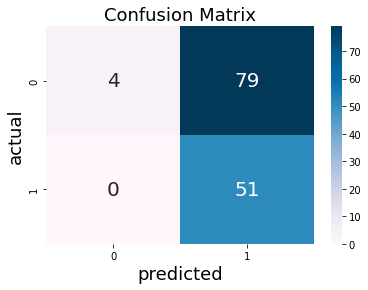

None
Training Accuracy: 0.4172284644194756


Validation Accuracy: 0.4014925373134329




In [45]:
model = GaussianNB()
cross_validate(model, StratifiedShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 42))

Recall:  0.9887640449438202
Accuracy:  0.40358744394618834
Precision:  0.4
F1:  0.56957928802589


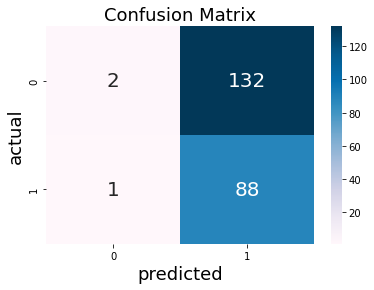

In [47]:
pipeline = Pipeline(steps=[

        ('preprocess', preprocess),

        ('classifier', model)

    ])
evaluation(y_test, pipeline.predict(X_test), title = 'Confusion Matrix')